### Short Pick Report 1 - Weekly Data

In [2]:
# Numerical Data Manipulation libraries
import pandas as pd
import numpy as np
import statistics as stat

# Figure Plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()

import matplotlib as mpl
sns.set_style('whitegrid')
sns.set_palette('Set2')
mpl.rcParams['font.size'] = 16
import matplotlib.gridspec as gridspec

# Naive Bayes libraries
import sklearn
from sklearn.naive_bayes import BernoulliNB      # Naive Bayes Classifier based on a Bernoulli Distribution
from sklearn.naive_bayes import GaussianNB       # Naive Bayes Classifier based on a Gaussian Distribution
from sklearn.naive_bayes import MultinomialNB    # Naive Bayes Classifier based on a Multinomial Distribution

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
# Text Analysis libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')


<h4> December Week 1</h4>

In [3]:
# Import the data
filename = "Data/Short_Pick_Report_03081223.csv" 


Short_pick_decWk1 = pd.read_csv(filename)


In [4]:
# ----------- CLEANING THE DATA -----------
# Column rename & Dropping

Short_pick_decWk1.rename(columns={'Bin:': 'Pickface', 'Part Number:': 'Stock Code', 'Picked By:': 'Picker', 'Site Qty @ Pick Time': 'Warehouse Qty', 'Bin Qty @ Pick Time': 'Pickface Qty'}, inplace=True)

# Dropping columns
columns_to_drop = ['Delivery To Name:', 'Exported?', 'Sales Order:', 'Part Description:', 'Time:' ]  # List of columns to drop
Short_pick_decWk1.drop(columns=columns_to_drop, inplace=True)

# Creating a new DataFrame
Short_DecWk1 = Short_pick_decWk1.copy()  # Creating a copy of the modified DataFrame

drop_condition = (Short_DecWk1['Picked:'] == 0) & (Short_DecWk1['Warehouse Qty'] == 0)  & (Short_DecWk1['Pickface Qty'] == 0)

Short_DecWk1 = Short_DecWk1[~drop_condition]

print(Short_DecWk1)


       Pickface  Stock Code   Picker  Warehouse Qty  Pickface Qty  Ordered:  \
4     8.36.3.40    11610051  gregory          0.000         0.000       2.0   
6     8.11.1.10    11430610     levi        191.525       191.525       4.8   
8     8.16.3.15    11570567      ben          5.000         5.000      10.0   
10    5.14.4.90    11040413  gregory          5.000         5.000       6.0   
11   10.03.1.10    11490845     levi          1.000         1.000      10.0   
..          ...         ...      ...            ...           ...       ...   
187         COI    11430138    damir       -110.000      -110.000     150.0   
190         FOI    11040080    damir          0.000         0.000       2.0   
195   8.11.1.10    11430610     levi        182.025       182.025       4.8   
197  10.09.3.20    11160601     levi          2.000         0.000       4.0   
199   5.10.1.20    11010082   davidm        124.000       124.000       1.0   

     Picked:  
4       1.00  
6       4.74  
8     

In [21]:
#Adding new column with difference of columns ordered and picked

 #Creating a new column containing the difference
Short_DecWk1['Difference'] = Short_DecWk1['Ordered:'] - Short_DecWk1['Picked:']

# Creating a new DataFrame with selected columns and the 'Difference' column
#new_df = original_df[['New_Column_A', 'New_Column_C', 'Difference']].copy()

Pickface_counts = Short_DecWk1['Pickface'].value_counts()

#filter shorted items by warehouse qty and a pickface of 0 or negative
warehouse_filtered_items = Short_DecWk1[(Short_DecWk1['Warehouse Qty'] >= 1) & (Short_DecWk1['Pickface Qty'] >= -1000) & (Short_DecWk1['Picked:'] == 0)] 

#filter shorted items by pickface qty >= 1 
pickface_filtered_items = Short_DecWk1[(Short_DecWk1['Warehouse Qty'] >= 1) & (Short_DecWk1['Pickface Qty'] >= 1) & (Short_DecWk1['Picked:'] == 0)]



Picker_counts_warehouse = warehouse_filtered_items['Picker'].value_counts() #counts pickers shorts for warehouse qty

Picker_counts_pickface = pickface_filtered_items['Picker'].value_counts() #counts pickers for shorts on pickface qty


pickfaces_2_or_more_shorts = Pickface_counts[Pickface_counts >= 2]

#print(top4_pickers)
#print(grouped_pickface_picker)
#group data by the top 2 shorted 
#COI_Data = grouped_Pickface['COI']
#DOI_Data = grouped_Pickface['DOI']
#print("Items in pickface 'DOI' :\n",DOI_Data)

#print(Pickface_counts)
print(Picker_counts_warehouse)
print(Picker_counts_pickface)
#print(Stock_counts)

Picker
levi       8
damir      8
gregory    3
jackr      3
lachlyn    2
Troy       2
tim        2
ben        1
kane       1
simonb     1
samt       1
spiro      1
mick       1
davidm     1
Name: count, dtype: int64
Picker
levi       8
damir      8
gregory    3
jackr      3
Troy       2
tim        2
ben        1
simonb     1
samt       1
spiro      1
lachlyn    1
mick       1
davidm     1
Name: count, dtype: int64


The short pick counts for the week show **COI** **DOI** as the top 2 contenders for most shorted locations. 

<function matplotlib.pyplot.show(close=None, block=None)>

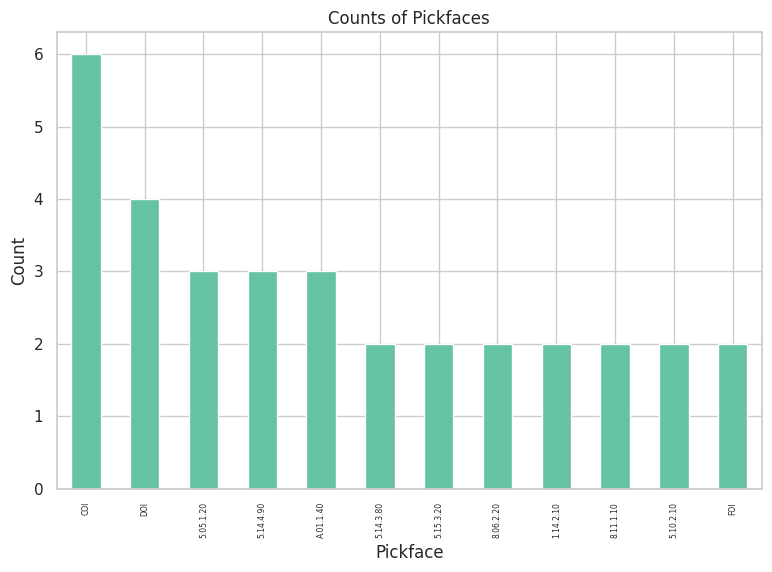

In [8]:
#basic plot for shorted counts of pickfaces 

plt.figure(figsize=(8,6))
pickfaces_2_or_more_shorts.plot(kind='bar')
plt.xlabel('Pickface')
plt.ylabel('Count')
plt.title('Counts of Pickfaces')
plt.xticks(rotation=90, fontsize=5.5)
plt.tight_layout()
plt.show

I have only included pick faces with a shorted count of 2 or more to visualise only the repeat offenders. 

**COI** and **DOI** are the top 2 for this week 

<function matplotlib.pyplot.show(close=None, block=None)>

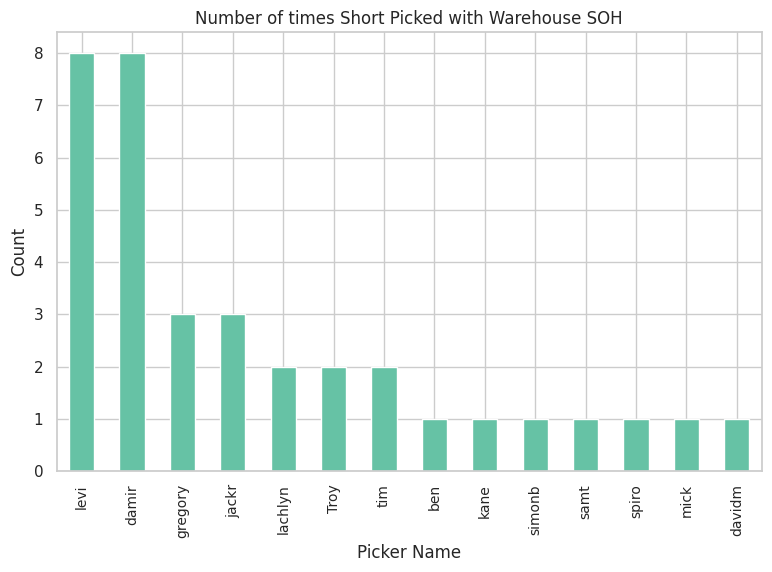

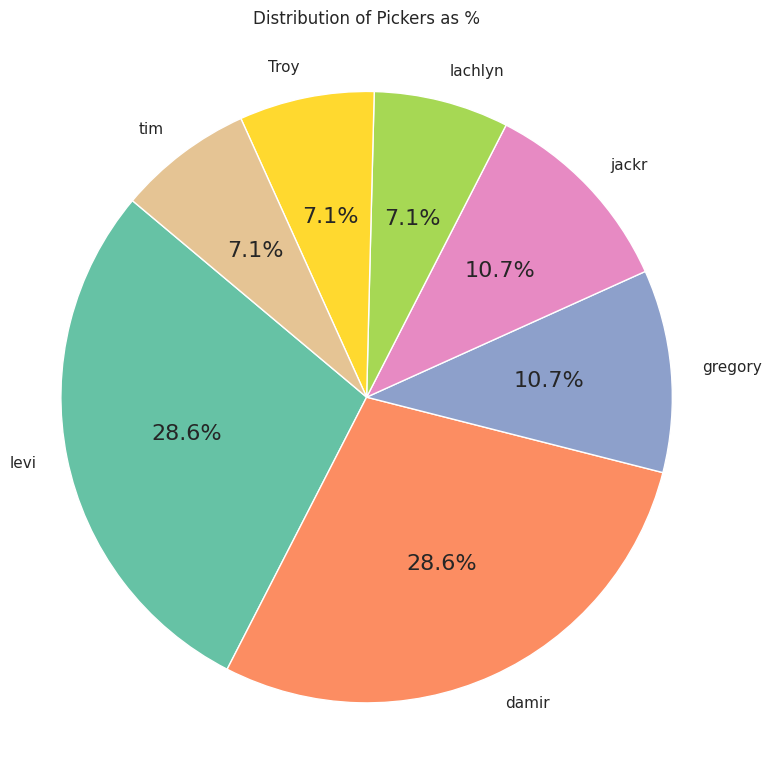

In [13]:
#counts for pickers

plt.figure(figsize=(8,6))
Picker_counts_warehouse.plot(kind='bar')
plt.xlabel('Picker Name')
plt.ylabel('Count')
plt.title('Number of times Short Picked with Warehouse SOH')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show

threshold = 5
filtered_counts = Picker_counts_warehouse[Picker_counts_warehouse/Picker_counts_warehouse.sum()* 100 >= threshold]
plt.figure(figsize=(8,8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pickers as %')
plt.axis('equal')
plt.tight_layout()

plt.show

I have filtered the selection of what is a 'short pick' to only identify the problematic shorts. I have removed all shorts from measurement with values in Warehouse and Pickface of 0 
and I have split the shorts into 2 different groups, and will continue to track these throughout the months on a weekly basis. The first being, I have pulled the data from short picks with Warehouse qty greater than or equal to 1, and secondly I have pulled data from both pickface and warehouse qty greater than or equal to 1. 

These 2 measurements will allow us to see who is shorting products that are in another location of the warehouse, potentially indicating an issue with the picker or a reason why these were not able to be picked (eg, in an unidentifiable pickface (4.0.0) or products stuck in an inaccessible location with a wave). Those shorting stocks with a pickface qty could indicate a different issue, such as stock in the wrong location or incorrect counts.

<function matplotlib.pyplot.show(close=None, block=None)>

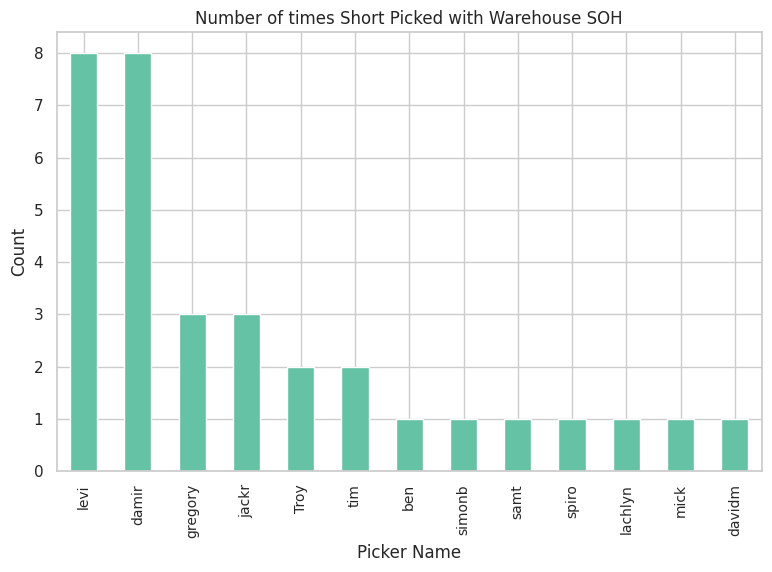

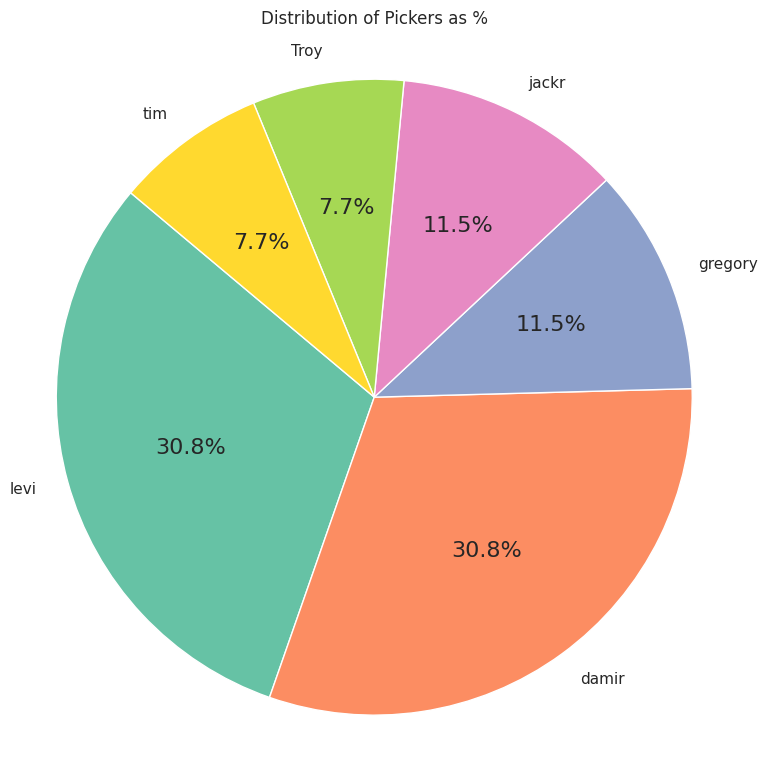

In [14]:
#counts for pickers with soh in pickface

plt.figure(figsize=(8,6))
Picker_counts_pickface.plot(kind='bar')
plt.xlabel('Picker Name')
plt.ylabel('Count')
plt.title('Number of times Short Picked with Warehouse SOH')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show

threshold = 5
filtered_counts = Picker_counts_pickface[Picker_counts_pickface/Picker_counts_pickface.sum()* 100 >= threshold]
plt.figure(figsize=(8,8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pickers as %')
plt.axis('equal')
plt.tight_layout()

plt.show

The above is a list and a count of all products that were picked even with **0** quantity of stock in warehouse and the pickface. 

There were **20** items this week that managed to be picked even with no stock on hand.

In [28]:
#Export the filtered data out into their own CSVs 

#filtered_items.to_csv('Data/filtered_items_dec.csv', index=False, header=True)
Picker_counts_warehouse.to_csv('Data/Picker_counts_warehouse_dec.csv', header=True)
Picker_counts_pickface.to_csv('Data/Picker_counts_pickface_dec.csv', header = True)
Short_DecWk1.to_csv('Data/Short_Dec.csv', index=False, header=True)